# Multiple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [2]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Exploratory Data analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.8+ KB


In [4]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

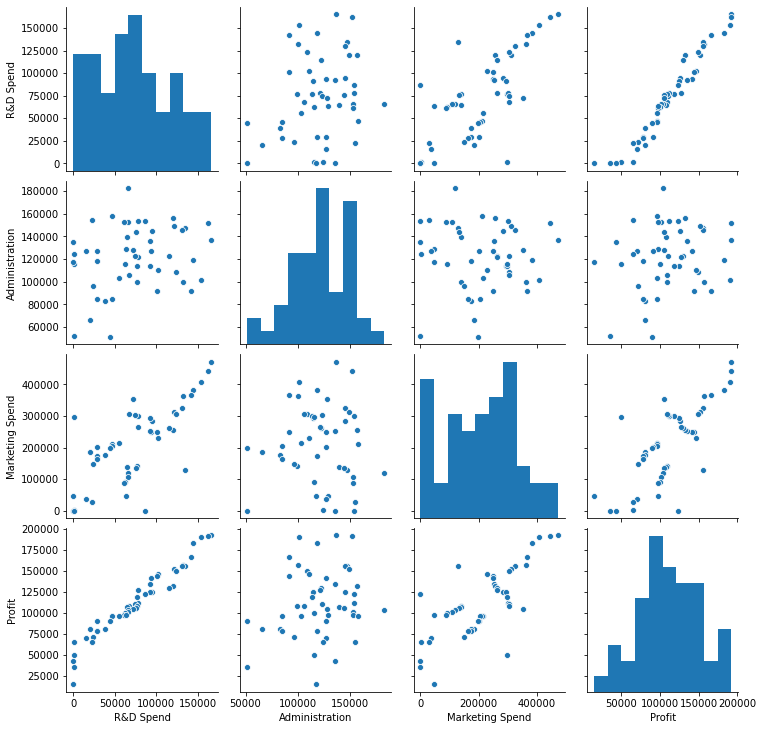

In [5]:
sns.pairplot(df)

In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


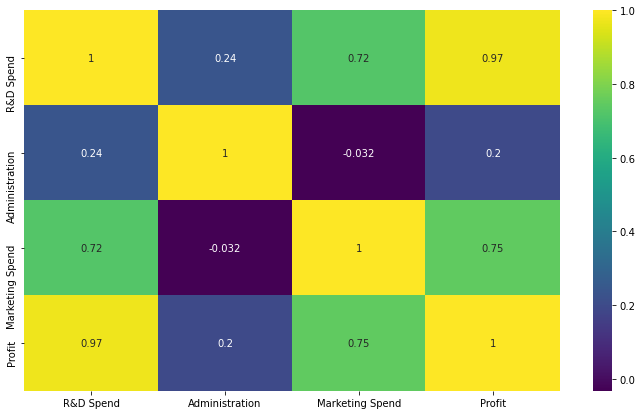

In [8]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

(10.0, 0.0)

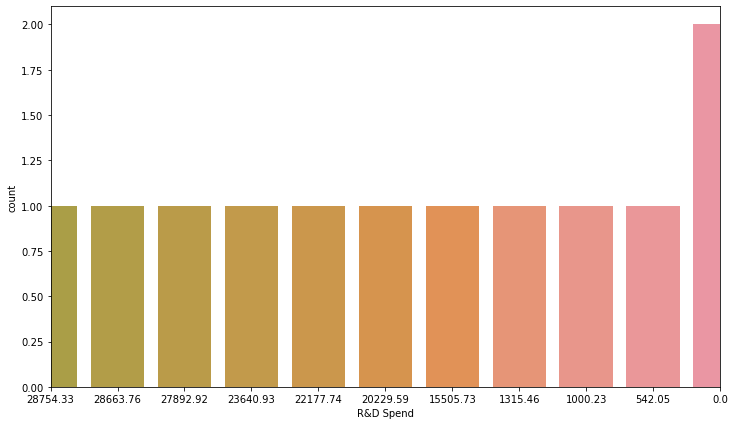

In [9]:
plt.figure(figsize=(12,7))
sns.countplot(x='R&D Spend',data=df)
plt.xlim(10, 0)

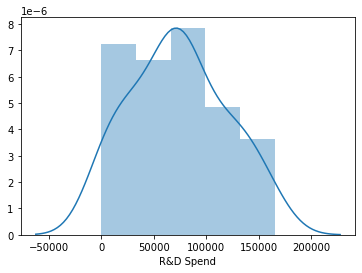

In [10]:
sns.distplot(df['R&D Spend'])

In [11]:
df.corr()['R&D Spend'].sort_values()

Administration     0.241955
Marketing Spend    0.724248
Profit             0.972900
R&D Spend          1.000000
Name: R&D Spend, dtype: float64

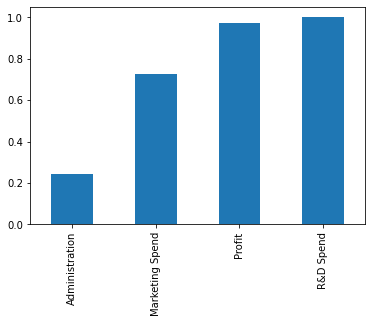

In [12]:
df.corr()['R&D Spend'].sort_values().plot(kind='bar')

## Encoding categorical data

In [13]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

## Splitting the dataset into the Training set and Test set

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=0)

## Training the Multiple Linear Regression model on the Training set

In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

LinearRegression()

## Predicting the Test set results

In [17]:
ypred = regressor.predict(xtest)
np.set_printoptions(precision=2)
print(np.concatenate((ypred.reshape(len(ypred),1), ytest.reshape(len(ytest),1)),1))

[[104440.73 103282.38]
 [132253.82 144259.4 ]
 [132872.07 146121.95]
 [ 71707.79  77798.83]
 [178678.99 191050.39]
 [115078.13 105008.31]
 [ 66093.93  81229.06]
 [ 98759.73  97483.56]
 [114113.6  110352.25]
 [167979.49 166187.94]
 [ 95786.77  96778.92]
 [ 87785.35  96479.51]
 [110455.98 105733.54]]


## Evaluation Matrix

In [18]:
from sklearn.metrics import *
print(f'R2: {r2_score(ytest,ypred)}\nMSE:-{mean_squared_error(ytest,ypred)}\nRMSE:-{np.sqrt(mean_squared_error(ytest,ypred))}\n')

R2: 0.9315815199152208
MSE:-73809312.88228515
RMSE:-8591.234654127726

